**Problématique :** La consommation énergétique des véhicules français évolue au fil des années. S’agit-il d’une réponse des constructeurs automobiles aux nouvelles politiques énergétiques et environnementales du gouvernement ? Comparaison des taux de conversion de diverses sources d'énergie

In [31]:
# import pandas as pd

# excel_file = 'dataset/Vehicules_GNV_immatricules_en_FR.xlsx'
# sheet_name = 'SIV COMPLET'

# df = pd.read_excel(excel_file, sheet_name=sheet_name)

# csv_file = 'output_file.csv'
# df.to_csv(csv_file, index=False)


In [32]:
import pandas as pd

df = pd.read_excel("dataset/Vehicules_GNV_immatricules_en_FR.xlsx",sheet_name="SIV COMPLET")

In [33]:
df

,ID,CP Proprio,Ville Proprio,CP Locataire,Ville Locataire,Marque Véhicule,Modèle Véhicule,b4.date_prem_immat,b4.date_immat_siv,b5.masse_f1,...,Département titulaire,Département locataire,Région Administrative d'immatriculation,Carburant SIV,Genre SIV,Tranche de PTAC,Marque corrigée,Age,Année d'immatriculation,Date de la suppression du fichier des immatriculations
0,680554580,31902.0,TOULOUSE CEDEX 9,NaN,NaN,IRISBUS,CITELIS 12 GNC,39967,39967.0,19845.0,...,31.0,NaN,Midi-Pyrénées,Gaz naturel,Bus,16 t< PTAC ≤ 26 t,IRISBUS,7.997260,2009,NaN
1,680554581,31011.0,TOULOUSE,NaN,NaN,IRISBUS,CITELIS 12 6NC,39933,39933.0,19845.0,...,31.0,NaN,Midi-Pyrénées,Gaz naturel,Bus,16 t< PTAC ≤ 26 t,IRISBUS,8.084932,2009,NaN
2,680554582,67000.0,STRASBOURG,NaN,NaN,FIAT,DOBLO CARGO,39938,39938.0,2070.0,...,67.0,NaN,Alsace,Bicarburation essence-gaz naturel,"Camionnettes (PTAC ≤3,5 t)","PTAC<3,5t",FIAT,8.071233,2009,NaN
3,680554583,67046.0,STRASBOURG,NaN,NaN,CITROEN,C3,39948,39948.0,1510.0,...,67.0,NaN,Alsace,Bicarburation essence-gaz naturel,Véhicules Particuliers,"PTAC<3,5t",CITROEN,8.043836,2009,NaN
4,680554584,31151.0,FENOUILLET CEDEX,NaN,NaN,OPEL,COMBO GNV,39932,39932.0,1945.0,...,31.0,NaN,Midi-Pyrénées,Gaz naturel,"Camionnettes (PTAC ≤3,5 t)","PTAC<3,5t",OPEL,8.087671,2009,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,680568453,68110.0,ILLZACH,NaN,NaN,CITROEN,NaN,38659,NaN,1473.0,...,68.0,NaN,Alsace,Bicarburation essence-gaz naturel,"Camionnettes (PTAC ≤3,5 t)","PTAC<3,5t",CITROEN,11.575342,2005,NaN
15321,680568490,25000.0,BESANCON,NaN,NaN,CITROEN,C3,39722,NaN,1493.0,...,25.0,NaN,Franche-Comté,Bicarburation essence-gaz naturel,"Camionnettes (PTAC ≤3,5 t)","PTAC<3,5t",CITROEN,8.663014,2008,NaN
15322,680568535,24000.0,PERIGUEUX,NaN,NaN,CITROEN,BERLINGO,38398,NaN,0.0,...,24.0,NaN,Aquitaine,Bicarburation essence-gaz naturel,"Camionnettes (PTAC ≤3,5 t)","PTAC<3,5t",CITROEN,12.290411,2005,NaN
15323,680568581,25000.0,BESANCON,NaN,NaN,CITROEN,BERLINGO,39255,NaN,1850.0,...,25.0,NaN,Franche-Comté,Bicarburation essence-gaz naturel,"Camionnettes (PTAC ≤3,5 t)","PTAC<3,5t",CITROEN,9.942466,2007,NaN


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15325 entries, 0 to 15324
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   ID                                                      15325 non-null  int64  
 1   CP Proprio                                              15141 non-null  float64
 2   Ville Proprio                                           15141 non-null  object 
 3   CP Locataire                                            1666 non-null   float64
 4   Ville Locataire                                         1666 non-null   object 
 5   Marque Véhicule                                         15325 non-null  object 
 6   Modèle Véhicule                                         11777 non-null  object 
 7   b4.date_prem_immat                                      15325 non-null  int64  
 8   b4.date_immat_siv                   

In [35]:
df.isnull().sum()

ID                                                            0
CP Proprio                                                  184
Ville Proprio                                               184
CP Locataire                                              13659
Ville Locataire                                           13659
Marque Véhicule                                               0
Modèle Véhicule                                            3548
b4.date_prem_immat                                            0
b4.date_immat_siv                                          4575
b5.masse_f1                                                1222
b5.masse_f2                                                  50
b5.masse_f3                                                3804
b5.masse_f4                                                1788
b5.poids_a_vide                                              59
b5.categorie                                               4512
b5.genre                                

Type d'énergie

In [36]:
energy_types = df['Carburant SIV'].value_counts()
print(energy_types)

Carburant SIV
Bicarburation essence-gaz naturel                                                         7668
Gaz naturel                                                                               7524
Mélange de gazole et gaz naturel (dual fuel) et électricité (hybride non rechargeable)      76
Gaz naturel-électricité (hybride rechargeable)                                              30
Bicarburation essence-gaz naturel et électricité (hybride non rechargeable)                  7
Mélange de gazole et gaz naturel (dual fuel) et électricité (hybride rechargeable)           6
Mélange de gazole et gaz naturel (dual fuel)                                                 6
Bicarburation superéthanol-gaz naturel                                                       5
Bicarburation essence-gaz naturel et électricité (hybride rechargeable)                      3
Name: count, dtype: int64


In [37]:
yearly_energy_distribution = df.groupby(['Année d\'immatriculation', 'Carburant SIV']).size().unstack().fillna(0)
yearly_energy_distribution

Carburant SIV,Bicarburation essence-gaz naturel,Bicarburation essence-gaz naturel et électricité (hybride non rechargeable),Bicarburation essence-gaz naturel et électricité (hybride rechargeable),Bicarburation superéthanol-gaz naturel,Gaz naturel,Gaz naturel-électricité (hybride rechargeable),Mélange de gazole et gaz naturel (dual fuel),Mélange de gazole et gaz naturel (dual fuel) et électricité (hybride non rechargeable),Mélange de gazole et gaz naturel (dual fuel) et électricité (hybride rechargeable)
Année d'immatriculation,,,,,,,,,
1950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1954,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1957,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1958,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1960,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
1961,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1962,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1963,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


<Figure size 1200x600 with 0 Axes>

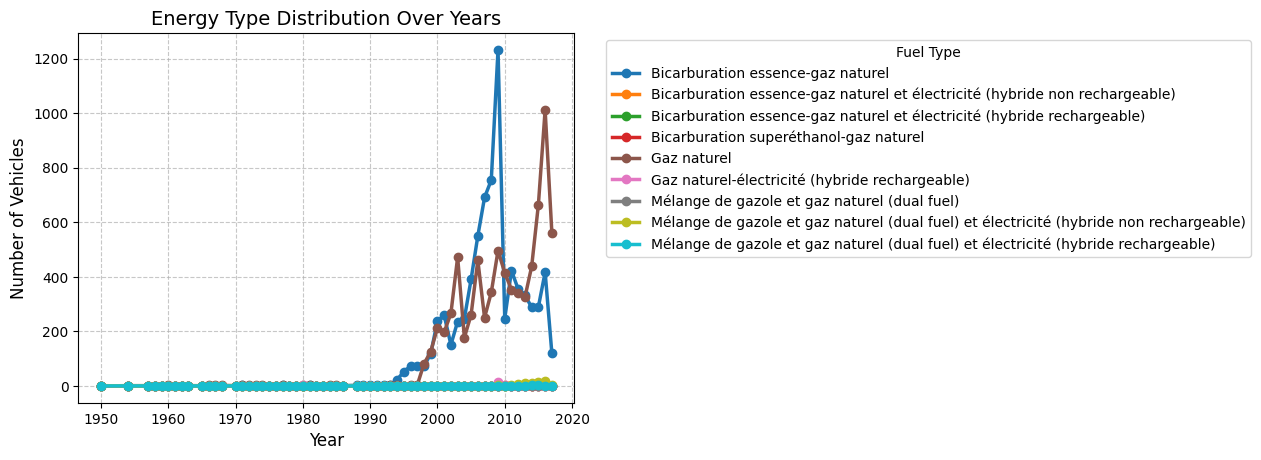

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
yearly_energy_distribution.plot(kind='line', colormap='tab10', marker='o', linewidth=2.5)
plt.title('Energy Type Distribution Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Vehicles', fontsize=12)
plt.legend(title="Fuel Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Carburant SIV                             Bicarburation essence-gaz naturel  \
Genre SIV                                                                     
Autocars                                                                2.0   
Autres (deux roues, etc.)                                              80.0   
Autres véhicules automoteurs spécialisés                              303.0   
BOM                                                                     1.0   
Bus                                                                    17.0   
Camionnettes (PTAC ≤3,5 t)                                           5383.0   
Camions (3,5 t< PTAC)                                                   0.0   
Machines agricoles                                                      2.0   
Remorques                                                               0.0   
Semi remorques                                                          2.0   
Tracteurs agricoles                                 

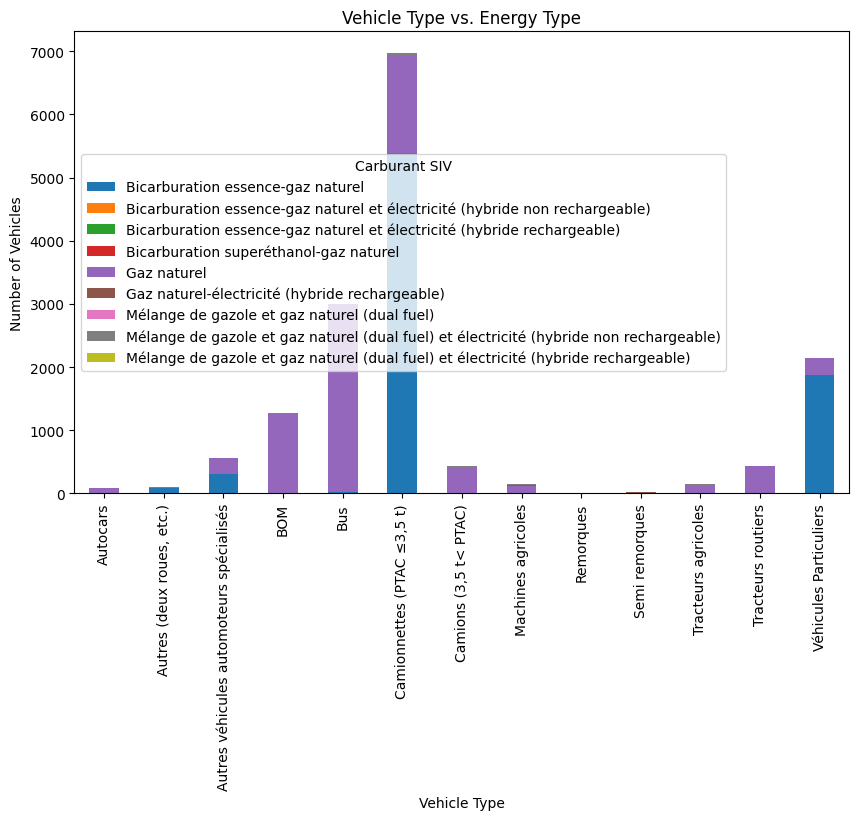

In [39]:
vehicle_energy_ratio = df.groupby(['Genre SIV', 'Carburant SIV']).size().unstack().fillna(0)
print(vehicle_energy_ratio)

vehicle_energy_ratio.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Vehicle Type vs. Energy Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Vehicles')
plt.show()

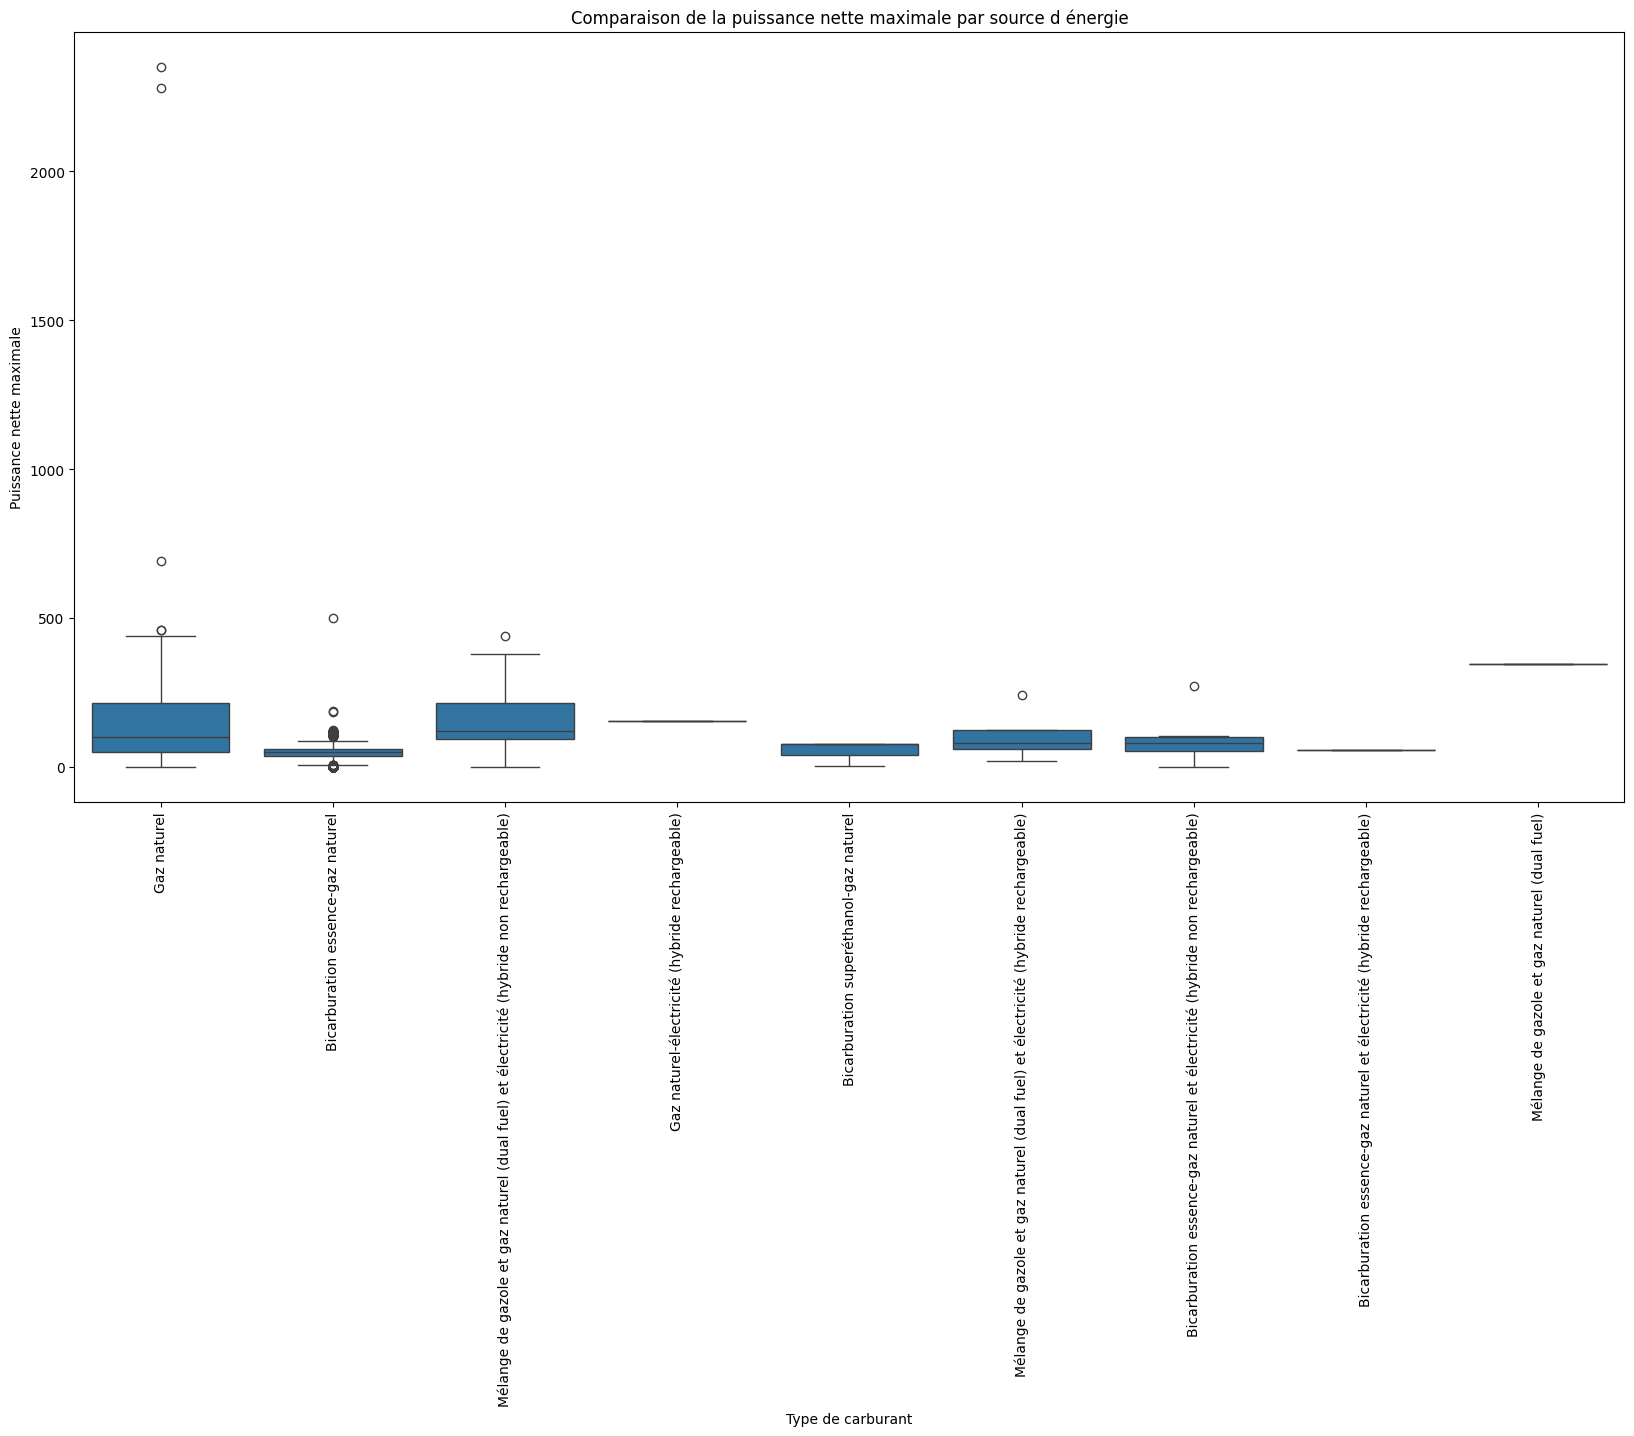

In [40]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(x='Carburant SIV', y='b5.puissance_net_maxi', data=df)
plt.title('Comparaison de la puissance nette maximale par source d énergie')
plt.xlabel('Type de carburant')
plt.ylabel('Puissance nette maximale')
plt.xticks(rotation=90)
plt.show()